<a href="https://colab.research.google.com/github/badri0843/CODSOFT/blob/main/TITANICPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC SURVIVAL PREDICTION**

NAME: N. BADRINADH

TASK 1

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

**Next, we can perform exploratory data analysis (EDA) to understand the dataset better**

In [4]:
# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Next, we can perform exploratory data analysis (EDA) to understand the dataset **

In [4]:
# Summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


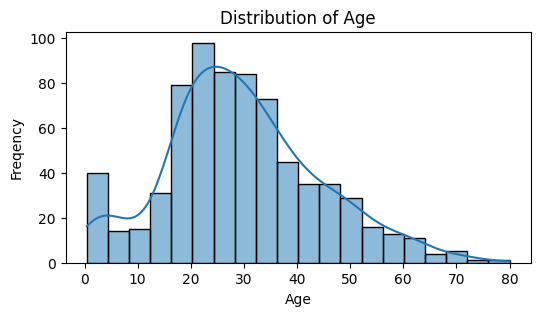

In [6]:
plt.figure(figsize=(6,3))
sns.histplot(df['Age'],bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Freqency')
plt.show()

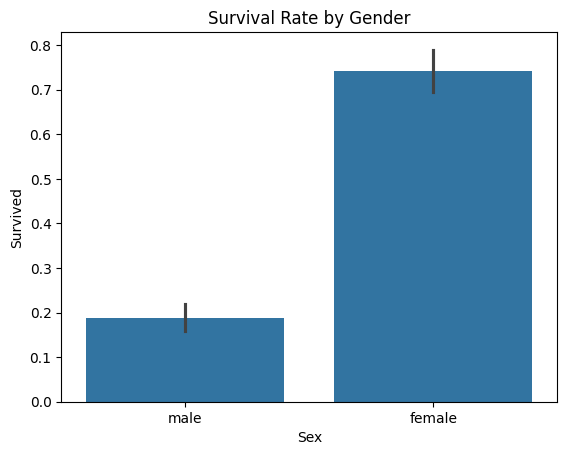

In [10]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

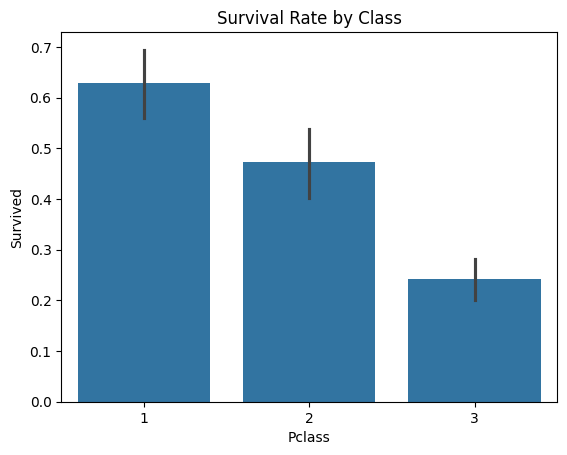

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

<ipython-input-12-f995e259a28b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


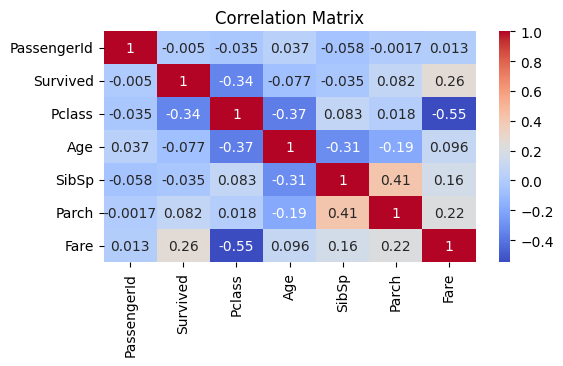

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#Correlation Matrix Calculation: The line correlation_matrix = df.corr() calculates the correlation matrix of the DataFrame df. The correlation matrix shows how each variable in the DataFrame is related to every other variable, indicating the strength and direction of their linear relationships.


In [13]:
#creating New feature for family
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

SHOWING NULL VALUES

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [15]:
#check class
df.Pclass.unique()

array([3, 1, 2])

In [16]:
#unique Embarked
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
#Check gender
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Create a function for survived

In [ ]:
def survival_vs_not_survival_by_class(data):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1_r')
    plt.title('Survival vs Not Survival in Each Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
    plt.show()

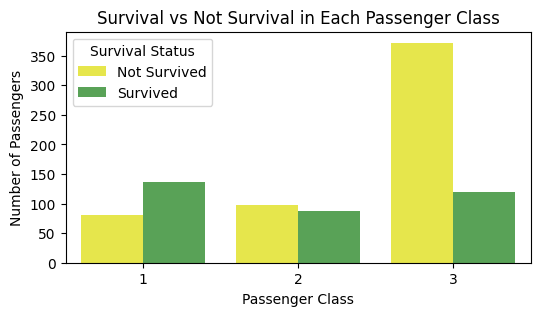

In [ ]:
survival_vs_not_survival_by_class(df)

SHOW TOTAL PASSENGERS GENDER ACCORDING TO EACH CLASS

   Class  Total
0      3    491
1      1    216
2      2    184


<ipython-input-20-0be21205ae04>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


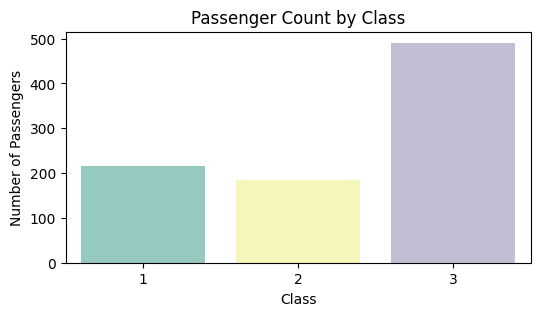

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df['Pclass'].value_counts()
class_df = pd.DataFrame(class_counts.reset_index().rename(columns={"index":"Class", "Pclass":"Total"}))
print(class_df)

plt.figure(figsize=(6, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

Passengers Arrived From Port

  port  Total
0    S    644
1    C    168
2    Q     77


<ipython-input-7-023726dc04fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_counts.index, y=port_counts.values, palette='viridis')


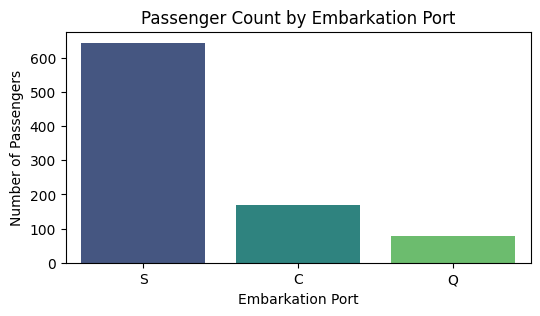

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ps = pd.DataFrame(df['Embarked'].value_counts().reset_index().rename(columns={"index": "port", "Embarked": "Total"}))
print(ps)

port_counts = df['Embarked'].value_counts()

plt.figure(figsize=(6, 3))
sns.barplot(x=port_counts.index, y=port_counts.values, palette='viridis')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.show()

Female Survived

Number of females who survived: 233
Number of females who did not survive: 81


<ipython-input-8-758965f22078>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[num_female_survived, num_female_not_survived], palette='Set2')


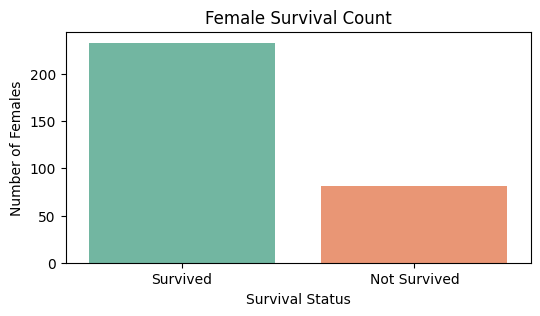

In [8]:
# Filter the dataset to include only females
female_passengers = df[df['Sex'] == 'female']

# Count the number of females who survived
female_survived = female_passengers[female_passengers['Survived'] == 1]

# Display the count of females who survived
num_female_survived = len(female_survived)

# Count the number of females who did not survive
num_female_not_survived = len(female_passengers) - num_female_survived

print(f'Number of females who survived: {num_female_survived}')
print(f'Number of females who did not survive: {num_female_not_survived}')

# Create a bar plot to visualize female survival
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'Not Survived'], y=[num_female_survived, num_female_not_survived], palette='Set2')
plt.title('Female Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Females')
plt.show()

MALE SURVIVED

Number of males who survived: 109
Number of males who did not survive: 468


<ipython-input-9-ce68787c62ea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[num_male_survived, num_male_not_survived], palette='Set2')


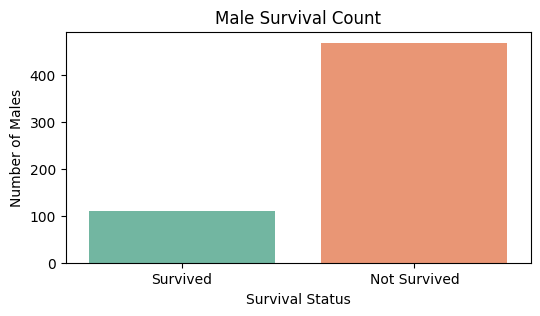

In [9]:
# Filter the dataset to include only males
male_passengers = df[df['Sex'] == 'male']

# Count the number of males who did survive
male_survived = male_passengers[male_passengers['Survived'] == 1]
num_male_survived = len(male_survived)

# Count the number of males who did not survive
male_not_survived = male_passengers[male_passengers['Survived'] != 1]
num_male_not_survived = len(male_not_survived)

print(f'Number of males who survived: {num_male_survived}')
print(f'Number of males who did not survive: {num_male_not_survived}')

# Create a bar plot to visualize male survival
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'Not Survived'], y=[num_male_survived, num_male_not_survived], palette='Set2')
plt.title('Male Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Males')
plt.show()

Show Text Ratio

<ipython-input-10-a537e9d0ef38>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Pastel1')


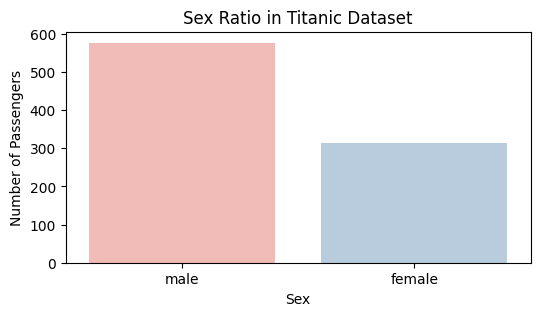

Sex Ratio in Titanic Dataset:
male      577
female    314
Name: Sex, dtype: int64


In [10]:
sex_counts = df['Sex'].value_counts()

# Create a bar plot to visualize the sex ratio
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Pastel1')
plt.title('Sex Ratio in Titanic Dataset')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Print the sex ratio
print('Sex Ratio in Titanic Dataset:')
print(sex_counts)

NUMBER OF MALE AND FEMALE SURVIVED IN EACH CLASS

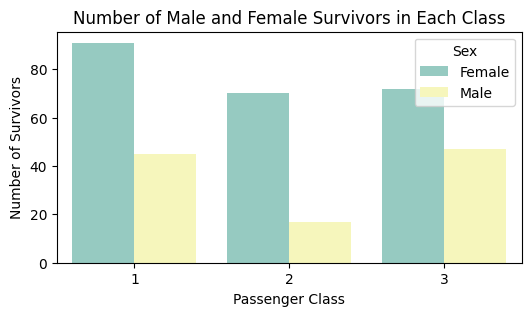

Number of Male and Female Survivors in Each Class:
Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47


In [11]:
# Filter the dataset to include only survivors
survivors = df[df['Survived'] == 1]

# Create a bar plot to visualize the number of male and female survivors in each class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.countplot(data=survivors, x='Pclass', hue='Sex', palette='Set3')
plt.title('Number of Male and Female Survivors in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# Count the number of male and female survivors in each class
survivors_by_class = survivors.groupby(['Pclass', 'Sex']).size().unstack()

print('Number of Male and Female Survivors in Each Class:')
print(survivors_by_class)

In [12]:
df.groupby('Sex').Survived.value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

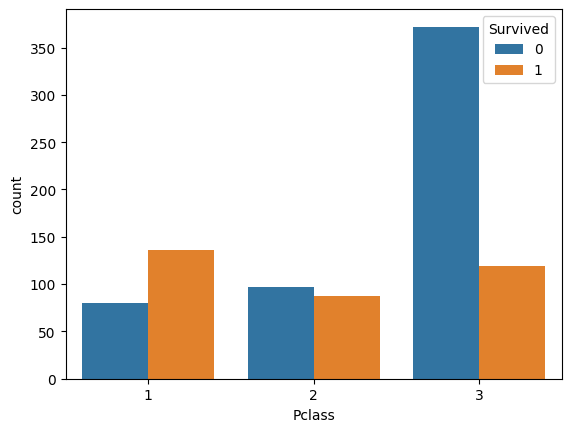

In [13]:
sns.countplot(data=df, x = 'Pclass', hue = 'Survived');

In [14]:
#Survived target feature
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Effect of social economy in survival rate

<ipython-input-15-0c7e3716ee7f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette='BuGn')


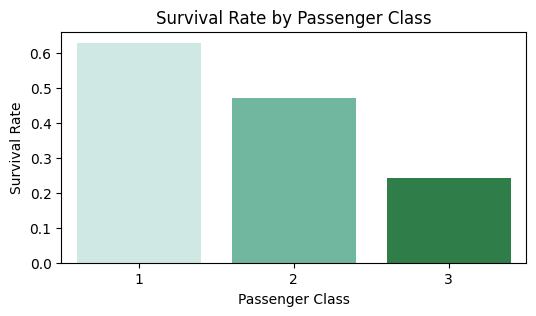

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [15]:
# Calculate survival rate by passenger class
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

# Create a bar plot to visualize survival rate by passenger class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette='BuGn')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by passenger class
print('Survival Rate by Passenger Class:')
print(survival_rate_by_class)

AGE SURVIVED

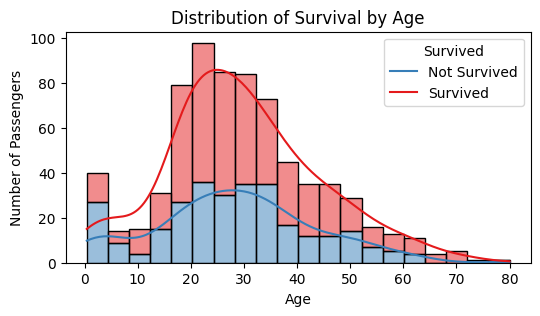

In [16]:
# Create a histogram of ages for passengers who survived and those who did not
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, palette='Set1')
plt.title('Distribution of Survival by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Mean Age of Passengers by Survival Rate

<ipython-input-17-f83b24175a44>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[mean_age_survived, mean_age_not_survived], palette='Paired')


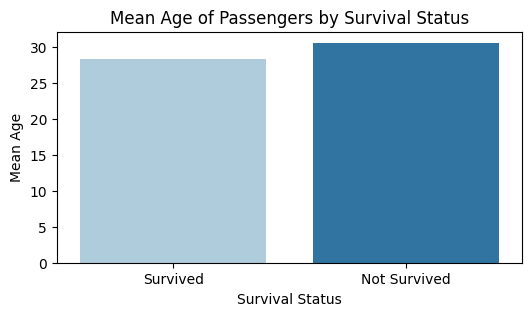

Mean age of passengers who survived: 28.34
Mean age of passengers who did not survive: 30.63


In [17]:
# Calculate the mean age of passengers who survived and those who did not survive
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
# Create a bar plot to visualize the mean ages
plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'Not Survived'], y=[mean_age_survived, mean_age_not_survived], palette='Paired')
plt.title('Mean Age of Passengers by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Mean Age')
plt.show()

# Print the mean ages
print(f"Mean age of passengers who survived: {mean_age_survived:.2f}")
print(f"Mean age of passengers who did not survive: {mean_age_not_survived:.2f}")

ADD NEW COLUMN AGE CATEGORY

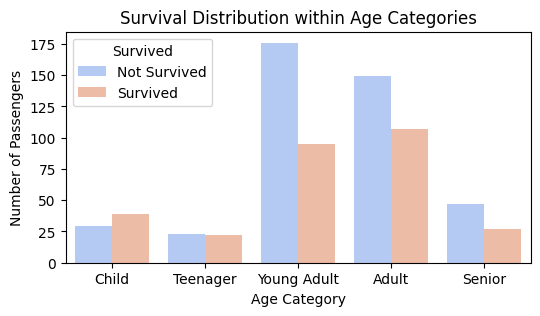

Number of Men, Women, and Children by Age Category:
Age Category  Child  Teenager  Young Adult  Adult  Senior
Sex                                                      
female           32        23           92     92      22
male             36        22          179    164      52


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age categories
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Add the "Age Category" column to the DataFrame
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a bar plot to visualize survival distribution within each age category
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Age Category', hue='Survived', palette='coolwarm')
plt.title('Survival Distribution within Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Count the number of men, women, and children based on sex and age category
count_by_sex_age = df.groupby(['Sex', 'Age Category']).size().unstack()

# Print the counts
print('Number of Men, Women, and Children by Age Category:')
print(count_by_sex_age)

Survived Rate According To Port

<ipython-input-19-b81afd96004e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_port.index, y=survival_rate_by_port.values, palette='YlGnBu')


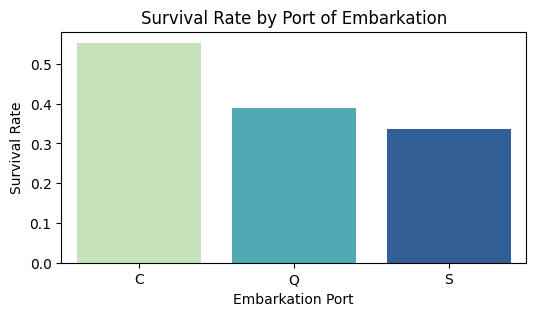

Survival Rate by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [19]:
# Assuming df is your DataFrame containing the data
# Calculate survival rate by port of embarkation
survival_rate_by_port = df.groupby('Embarked')['Survived'].mean()
# Create a bar plot to visualize survival rate by port of embarkation
plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_port.index, y=survival_rate_by_port.values, palette='YlGnBu')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by port of embarkation
print('Survival Rate by Port of Embarkation:')
print(survival_rate_by_port)

VISUALISE

SEX RATIO

In [20]:
print('Sex Ratio in Titanic Dataset: ')
print(sex_counts)

Sex Ratio in Titanic Dataset: 
male      577
female    314
Name: Sex, dtype: int64


Survival Rate

<ipython-input-21-e4c798edbcc2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values, palette='Set2')


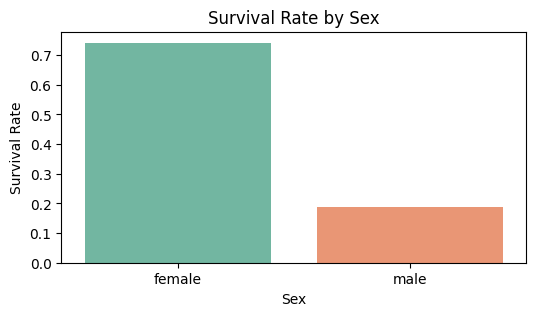

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [21]:
# Calculate survival rate by sex
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()
# Create a bar plot to visualize survival rate by sex
plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values, palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by sex
print('Survival Rate by Sex:')
print(survival_rate_by_sex)

Men, Women & Child

<ipython-input-22-37ca9304880c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Men', 'Women', 'Child'], y=[men_count, women_count, child_count], palette='copper')


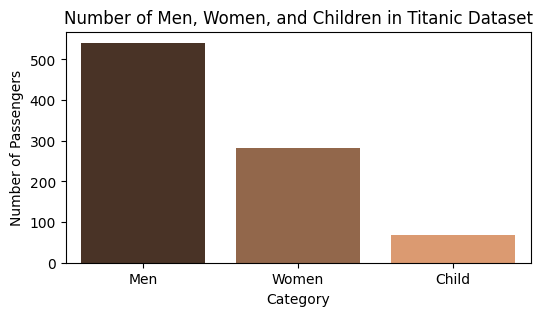

In [22]:
# Count the number of men, women, and children
men_count = len(df[(df['Sex'] == 'male') & (df['Age Category'] != 'Child')])
women_count = len(df[(df['Sex'] == 'female') & (df['Age Category'] != 'Child')])
child_count = len(df[df['Age Category'] == 'Child'])

# Create a bar plot to visualize the count of men, women, and children
plt.figure(figsize=(6, 3))
sns.barplot(x=['Men', 'Women', 'Child'], y=[men_count, women_count, child_count], palette='copper')
plt.title('Number of Men, Women, and Children in Titanic Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Passengers')
plt.show()

Age Distribution Of Passengers

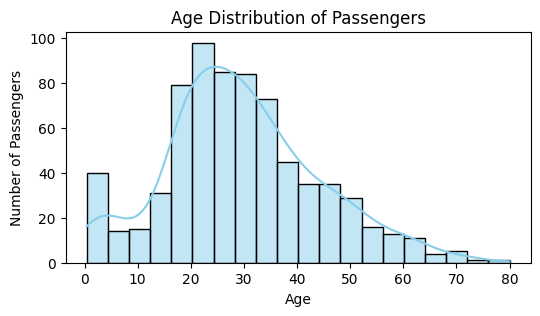

In [23]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Show The Age Distribution of According to Age

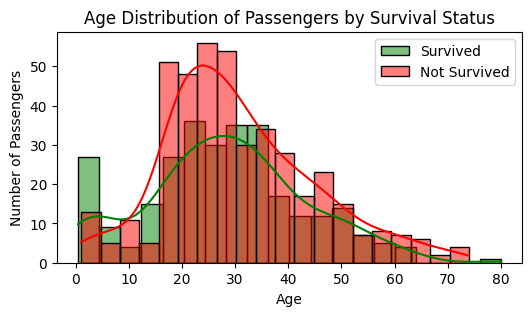

In [24]:
# Create separate dataframes for passengers who survived and those who did not
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Create histograms to visualize the age distribution for both groups
plt.figure(figsize=(6, 3))
sns.histplot(data=survived, x='Age', bins=20, kde=True, color='green', label='Survived')
sns.histplot(data=not_survived, x='Age', bins=20, kde=True, color='red', label='Not Survived')
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [25]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Age Category    177
dtype: int64

Total passengers who survived: 342
Total passengers who did not survive: 549


<ipython-input-26-ef7f4c87aefd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[total_survived, total_not_survived], palette='Set1')


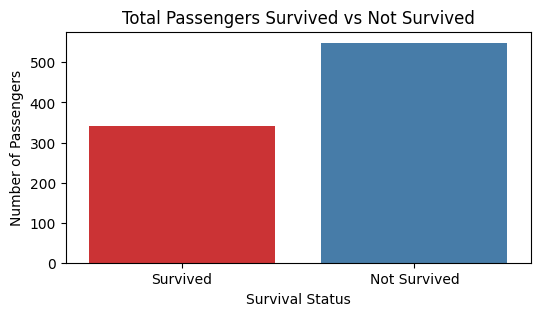

In [26]:
def show_total_survived(data):
    total_survived = data['Survived'].sum()
    total_not_survived = data.shape[0] - total_survived
    print(f'Total passengers who survived: {total_survived}')
    print(f'Total passengers who did not survive: {total_not_survived}')

    # Create a bar plot
    plt.figure(figsize=(6, 3))
    sns.barplot(x=['Survived', 'Not Survived'], y=[total_survived, total_not_survived], palette='Set1')
    plt.title('Total Passengers Survived vs Not Survived')
    plt.xlabel('Survival Status')
    plt.ylabel('Number of Passengers')
    plt.show()

# Call the function with your Titanic dataset
show_total_survived(df)

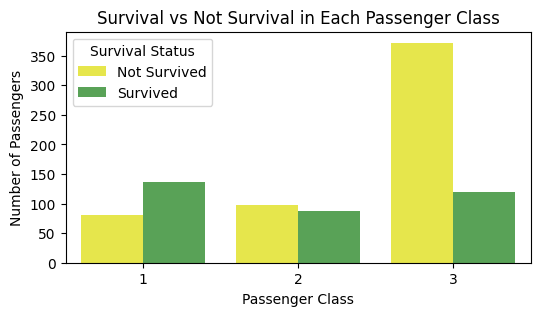

In [27]:
def survival_vs_not_survival_by_class(data):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1_r')
    plt.title('Survival vs Not Survival in Each Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
    plt.show()

# Call the function with your Titanic dataset
survival_vs_not_survival_by_class(df)

TOTAL PASSENGERS GENDER ACCORDING TO EACH CLASS

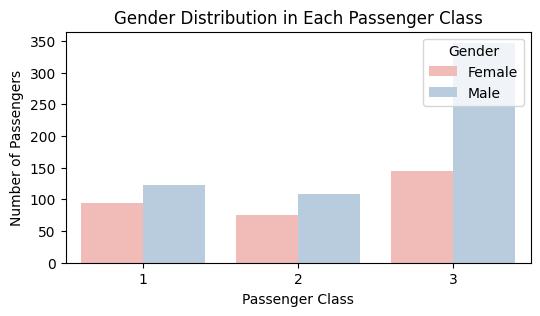

In [28]:
def gender_distribution_by_class(data):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x='Pclass', hue='Sex', palette='Pastel1')
    plt.title('Gender Distribution in Each Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
    plt.show()

# Call the function with your Titanic dataset
gender_distribution_by_class(df)

LISTING MOST RELATED CONTINIOUS VALUES TO TARGET

In [29]:
train_corr = df[['Survived', 'Age', 'Fare']].corr(method='spearman').abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()

train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
}, inplace=True)

train_corr = train_corr[(train_corr['Feature A'] == 'Survived')]

train_corr.style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
0,Survived,Survived,1.000000
3,Survived,Fare,0.323736
7,Survived,Age,0.052565


In [30]:
# Select columns of interest
selected_columns = ['Survived', 'Age', 'Fare']
selected_data = df[selected_columns]

# Calculate correlations between selected features
correlations = selected_data.corr()

# Print the correlations
print('Correlation between selected features:')
print(correlations)

Correlation between selected features:
          Survived       Age      Fare
Survived  1.000000 -0.077221  0.257307
Age      -0.077221  1.000000  0.096067
Fare      0.257307  0.096067  1.000000


In [31]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Age Category    177
dtype: int64

In [32]:

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [33]:
df = df.drop(columns='Cabin',axis=1)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Age Category  
0      0         A/5 21171   7.2500        S  Young Adult  
1      0          PC 17599  71.2833        C        Adult  
2      0  STON/O2. 3101282   7.9250        S  Young Adult  
3      0            113803  53.1000        S        Adult  
4      0            

In [34]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

Finding The mode value of "Embarked" Column

In [35]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


REPLACING MISSING VALUES IN "AGE CATEGORY" COLUMN WITH MODE VALUE

In [36]:
df['Age Category'].fillna(df['Age Category'].mode()[0],inplace=True)

Fill missing values with 'FARE' column with median value

In [39]:
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

In [40]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
Age Category    0
dtype: int64

In [41]:
df['Embarked'].fillna(0,inplace=True)

In [44]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age Category    0
dtype: int64

In [45]:
#converting categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

SPLITTING DATA INTO TWO PARTS

In [47]:
#X=df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Age Category", "FamilySize", "Name_pre"])
X = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Age Category"])

#Y=df["Survived"]
Y = df["Survived"]

In [48]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [50]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
X_train_prediction = model.predict(X_train)

In [54]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [55]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  0.8075842696629213


In [57]:

X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [58]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data: ',test_data_accuracy)

Accuracy score of test data:  0.7821229050279329


In [59]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [60]:
import pandas as pd

data = {"Pclass": [1], "Sex": [1], "Age": [32.0], "SibSp": [2], "Parch": [1], "Fare": [7.9250], "Embarked": [1]}
new_df2 = pd.DataFrame(data)

In [67]:
import numpy as np
# Assuming 'model' is your trained machine learning model

input_data = (3, 1, 27, 8, 2, 11.1333, 8)
input_np = np.asarray(input_data)
input_reshape = input_np.reshape(1, -1)

prediction = model.predict(input_reshape)

if prediction == 1:
    print("The person survived.")
else:
    print("The person did not survive.")

The person did not survive.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
